# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
#DataSet
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Revisaremos tipos de datos, filas y columnas. Fase exploratoria.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [4]:
#Revisión si hay valores únicos. Revisar si existen variables con un único valor a lo largo de la data.
v_uniques = df.nunique()
v_uniques

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

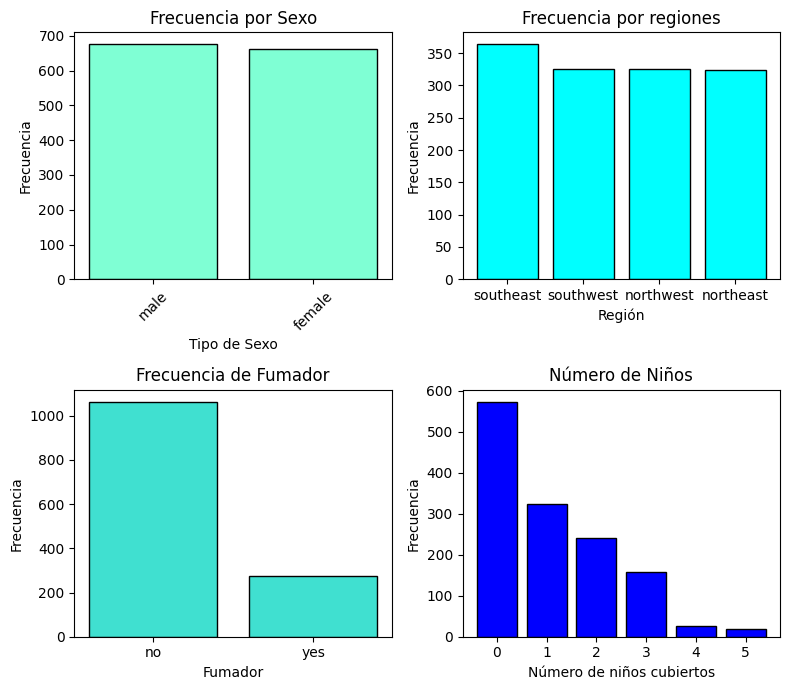

In [6]:
#Visualización de variables univariantes o categóricas:
# Creamos una figura con dos subplots (dos histogramas)
fig, ax = plt.subplots(2, 2, figsize=(8, 7))

counts_sex = df['sex'].value_counts()
counts_region = df['region'].value_counts()
counts_smoker = df['smoker'].value_counts()
counts_children = df['children'].value_counts()

# Crear un histograma en el primer subplot (Trabajo)
ax[0,0].bar(counts_sex.index, counts_sex.values, color='aquamarine', edgecolor='black')
ax[0,0].set_title('Frecuencia por Sexo')
ax[0,0].set_xlabel('Tipo de Sexo')
ax[0,0].set_ylabel('Frecuencia')
plt.setp(ax[0,0].get_xticklabels(), rotation=45)

# Histograma para el segundo subplot (Estado Civil)
ax[0,1].bar(counts_region.index, counts_region.values, color ='cyan', edgecolor='black')
ax[0,1].set_title('Frecuencia por regiones')
ax[0,1].set_xlabel('Región')
ax[0,1].set_ylabel('Frecuencia')

# Histograma para el segundo subplot (Vía de contacto)
ax[1,0].bar(counts_smoker.index, counts_smoker.values, color ='turquoise', edgecolor='black')
ax[1,0].set_title('Frecuencia de Fumador')
ax[1,0].set_xlabel('Fumador')
ax[1,0].set_ylabel('Frecuencia')

# Histograma para el segundo subplot (Resultado de la campaña previa)
ax[1,1].bar(counts_children.index, counts_children.values, color ='blue', edgecolor='black')
ax[1,1].set_title('Número de Niños')
ax[1,1].set_xlabel('Número de niños cubiertos')
ax[1,1].set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

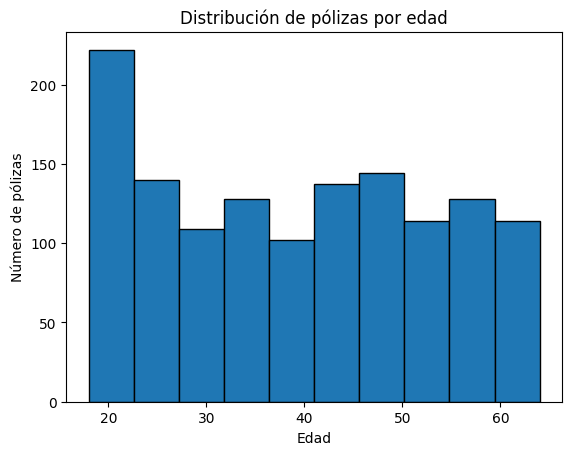

In [7]:
#Histograma de número de pólizas por edad.
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Número de pólizas')
plt.title('Distribución de pólizas por edad')
plt.show()

### Revisión de valores faltantes

In [8]:
#Revisar valores faltantes (en porcentaje) para su posterior exclusión de la data.
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

### Revisión de duplicados

In [9]:
#Revisión de filas duplicadas:
df.duplicated().sum()

np.int64(1)

In [10]:
#Evaluación de cuáles son esas filas que están duplicadas para eliminación
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
#Eliminación de filas repetidas
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape  #confirmamos nueva dimensión de nuestra data

(1337, 7)

In [12]:
#Guardamos nuevo dataframe (data/interim)
df_no_duplicates.to_csv('df_unknown.csv', index=False)

In [13]:
#Revisaremos si por columnas existen valores repetidos y mantendremos aquellos con los que se repiten.
df_no_duplicates.T.duplicated(keep=False)

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### Transformación de variables categóricas en numéricas:

In [14]:
#Transformar variables categóricas faltantes a variables numéricas con LabelEncoder (job, marital, contact, poutcome):

le_sex= LabelEncoder()
le_smoker = LabelEncoder()

df['sex_encoded'] = le_sex.fit_transform(df['sex'])
df['smoker_encoded'] = le_smoker.fit_transform(df['smoker'])

In [15]:
#Revisión de etiquetas numéricas asignadas
print(le_sex.classes_)
print(le_smoker.classes_)

['female' 'male']
['no' 'yes']


In [16]:
#Transformar variable categórica con OneHotEncoding (region)
df_encoded = pd.get_dummies(df, columns=['region'])
df_encoded

,age,sex,bmi,children,smoker,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,False,False,False,True
1,18,male,33.770,1,no,1725.55230,1,0,False,False,True,False
2,28,male,33.000,3,no,4449.46200,1,0,False,False,True,False
3,33,male,22.705,0,no,21984.47061,1,0,False,True,False,False
4,32,male,28.880,0,no,3866.85520,1,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,0,0,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,0,0,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,0,0,False,False,False,True


In [17]:
#Conversión de tipo booleanos a valores binarios
df_encoded[['region_northeast','region_northwest', 'region_southeast','region_southwest']] = df_encoded[['region_northeast','region_northwest', 'region_southeast', 'region_southwest']].astype(int)

In [18]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0,1,0,0


In [19]:
#Conservaremos un dataFrame donde tengamos todas las variables en números. 
df_numerics = df_encoded.drop(['sex','smoker','region_southwest'], axis=1)
df_numerics.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


### **Observaciones**
Eliminamos las columnas categóricas después de habernos quedado con su transformada y eliminamos la última de las categorías de 'region' porque si no son las tres primeras, por definición será la última. Así evitaremos redundancia. 

In [20]:
#Guardamos un nuevo DataFrame:
df_numerics.to_csv('df_numerics.csv', index = False)

In [21]:
#Hacemos revisión descriptiva de las variables a considerar en el modelo:
df_numerics.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_encoded,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_encoded,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_northeast,1338.0,0.242152,0.428546,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000


### Evaluación de correlaciones:

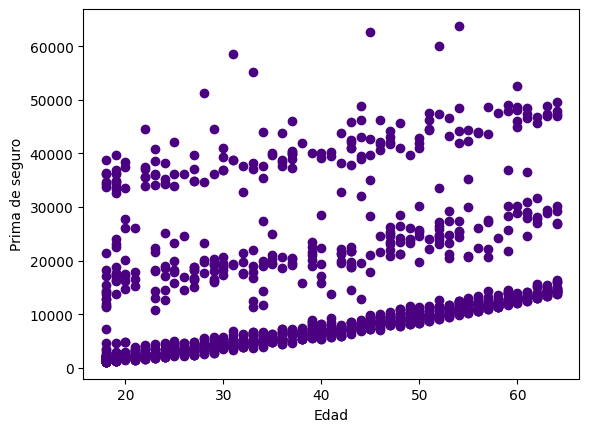

In [22]:
#Grafico de precios por minimo de noches:
x = df_numerics['age']
y = df_numerics['charges']

plt.scatter(x, y, color = 'indigo')
plt.xlabel('Edad')
plt.ylabel('Prima de seguro')
plt.show()

## **Observaciones** 
Existe un patrón de la edad frente a la prima de seguros. Es de imaginar que cuanta más edad tengas, menos esperanza de vida, más problemas de salud y por ende, la póliza encarece. 

In [23]:
#Grafico de primas de acuerdo a las variables (sexo y condición de fumador):
x = df_numerics.groupby('sex_encoded')['charges'].mean()
x1 = df_numerics.groupby('smoker_encoded')['charges'].mean()

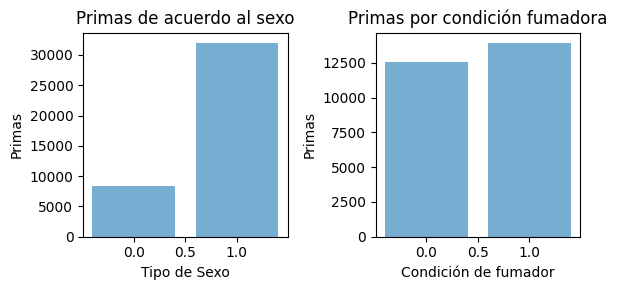

In [24]:
#Visualización de relaciones entre variables:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].bar(x1.index, x1.values, alpha=0.6, label='smoker_encoded (mean)')
ax[0].set_title('Primas de acuerdo al sexo')
ax[0].set_xlabel('Tipo de Sexo')
ax[0].set_ylabel('Primas')

ax[1].bar(x.index, x.values, alpha=0.6, label='sex_encoded (mean)')
ax[1].set_title('Primas por condición fumadora')
ax[1].set_xlabel('Condición de fumador')
ax[1].set_ylabel('Primas')


plt.tight_layout()
plt.show()

In [ ]:
#Evaluación de variables predictivas respecto a la objetivo (coeficientes de correlación):
corr = df_numerics.corr()['charges'].abs().sort_values(ascending=False)
print(corr.head(6))

charges             1.000000
smoker_encoded      0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
Name: charges, dtype: float64


## Partición de datos

In [26]:
X = df_numerics.drop(['charges'],axis=1)
y = df_numerics['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Revisaremos dimensiones de los datos de entrenamiento
X_train.shape

(1070, 8)

In [28]:
#Revisamos dimensiones de los datos de test. 
X_test.shape

(268, 8)

### Observaciones Influyentes

In [29]:
# Ajuste del modelo
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

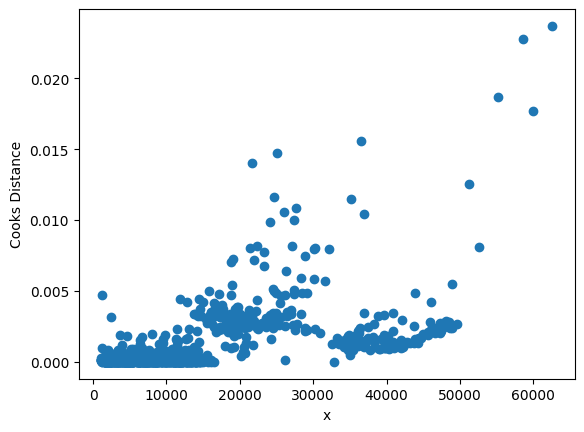

In [30]:
plt.scatter(y_train, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
pto_cook = 4/len(X_train)
pto_cook

0.003738317757009346

In [32]:
np.where(cooks_distance[0]>0.016)[0]

array([571, 722, 852, 928])

In [33]:
# Pólizas que se consideran observaciones influyentes
polizas_influyentes = np.where(cooks_distance[0]>pto_cook)[0]
print(f'Porcentaje de pólizas a desestimar: {len(polizas_influyentes)/len(df)*100}%')

Porcentaje de pólizas a desestimar: 4.708520179372197%


In [34]:
#Eliminamos del X_train y y_train aquellas que consideramos influyentes sobre el estudio:

X_train1 = X_train.loc[~X_train.index.isin(X_train.index[polizas_influyentes]),:]
y_train1 = y_train.loc[~X_train.index.isin(X_train.index[polizas_influyentes])]

### Evaluación de la importancia de las variables basado en algoritmo de árboles

In [45]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)
# Creamos un df de importancias de características
dict_data = {'Feature':X_train1.columns, 'Importancia':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)
# Ordenar descendentemente por importancia
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)

In [ ]:
# Variables cuya importancia es mayor o igual a un 0%
df_imp[df_imp['Importancia']>=0]

,Feature,Importancia
4,smoker_encoded,96.185585
1,bmi,1.587947
0,age,1.242292
5,region_northeast,0.284556
2,children,0.254574
3,sex_encoded,0.199957
7,region_southeast,0.128197
6,region_northwest,0.116892


In [49]:
# Variables cuya importancia es mayor o igual a un 1%
df_imp[df_imp['Importancia']>=1]

,Feature,Importancia
4,smoker_encoded,96.185585
1,bmi,1.587947
0,age,1.242292


## **Observaciones**
Me resulta curioso que casi 'smoked_encoded' tenga un nivel de importancia del 96% sobre el resto de las variables. Y sólo tres puedan tener un nivel de importancia mayor a 1. 

### VIF - Variance Inflation Factor

In [50]:
# Medir colinealidad de las variables para el modelo predictivo de regresión (Variance Inflation Factor)
vif = pd.Series([variance_inflation_factor(X_train1.corr().values, i) for i in range(X_train1.corr().shape[1])], index=X_train1.columns)
vif

age                 1.105961
bmi                 1.467549
children            1.028120
sex_encoded         1.036305
smoker_encoded      1.058820
region_northeast    4.185642
region_northwest    4.106520
region_southeast    4.623833
dtype: float64

## Observaciones 
Viendo que las primeras 5 variables los valores VIF giran entorno a 1, podríamos decir que entre ellos existe una baja colinealidad, sin embargo, para las variables de 'region' no podemos decir lo mismo. Ahora, tomando en cuenta su baja importancia y su alta colinealidad, no serán consideradas en el entrenamiento del modelo de Regresión lineal y múltiple.

In [ ]:
# Elimino las variables independientes que carecen de importancia para entrenar el modelo
X_train2 = X_train1.drop(df_imp[df_imp['Importancia']<0.5]['Feature'], axis=1)
X_test2 = X_test.drop(df_imp[df_imp['Importancia']<0.5]['Feature'], axis=1)

## Modelo de Regresión Lineal Simple

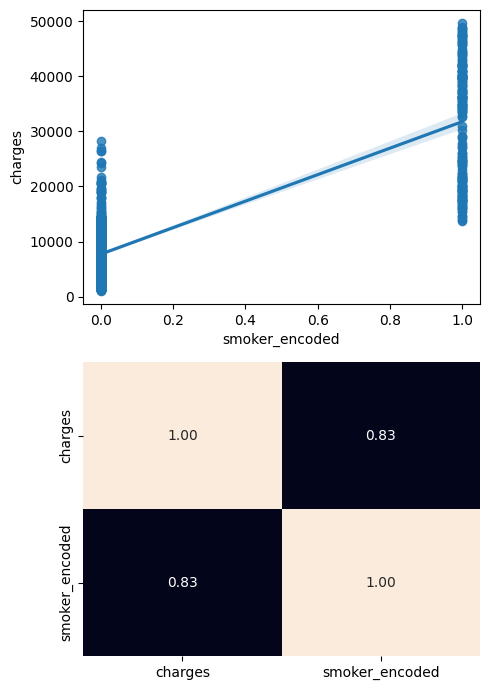

In [38]:
#Modelo de regresión lineal a partir de la condición fumadora.
fig, axis = plt.subplots(2, 1, figsize = (5, 7))
train_data = pd.concat([X_train2, y_train1], axis=1)

#Gráfico de regresión lineal
sns.regplot(ax = axis[0], data = train_data, x = "smoker_encoded", y = "charges")
#Heatmap de la correlación numérica entre ambas
sns.heatmap(train_data[["charges", "smoker_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

In [39]:
# Resultados de la Regresión Lineal (condición de fumadores):
x = train_data['smoker_encoded']
y = train_data['charges']

# Crear el modelo de regresión lineal
X = sm.add_constant(x)
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2312.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          7.68e-263
Time:                        19:02:41   Log-Likelihood:                -10236.
No. Observations:                1007   AIC:                         2.048e+04
Df Residuals:                    1005   BIC:                         2.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7739.0380    221.221     34.

## **Interpretación**

El R2 nos indica que casi el 70% de la variabilidad de las pólizas están explicadas por la condición de fumadores, con una probabilidad casi 0 (F-statistic). El modelo es significativo. En este caso la condición de fumadores tiene una importancia significativa sobre la póliza (siendo un muy fuerte predictor sobre la misma). 

Cuando la condición de fumadores es cero, el valor esperado de la póliza es de 7739 (prima promedio). Por otra parte, el incremento promedio para la condición de fumadores respecto a no fumadores es de 23990 (quiere decir que ser fumador incrementa casi por 24000€ la prima en promedio).

Por otra parte los intervalos de confianza del 2.5% y 97,5%, sugieren que en el 95% de los casos de las muestras tomadas para el estudio, la condición fumadora, incrementará en promedio la póliza entre 23.000€ y 25.000€. 

El coeficiente de Durbin-Watson ~ 2.065 (cercano a 2), podría sugerir que no hay una autocorrelación significativa en los residuos (señal de independencia de errores).

Los coeficientes de Omnibus y Jarque-Bera tienen p-valores bajos asociados, rechazando la hipótesis nula (distribución normal de los errores). Esto puede sugerir la aplicabilidad de un modelo no paramétrico, aunque, considero que si el fin último es conocer la variable predictora más influyente en las pólizas y su incremento promedio, esto podría sernos de utilidad.

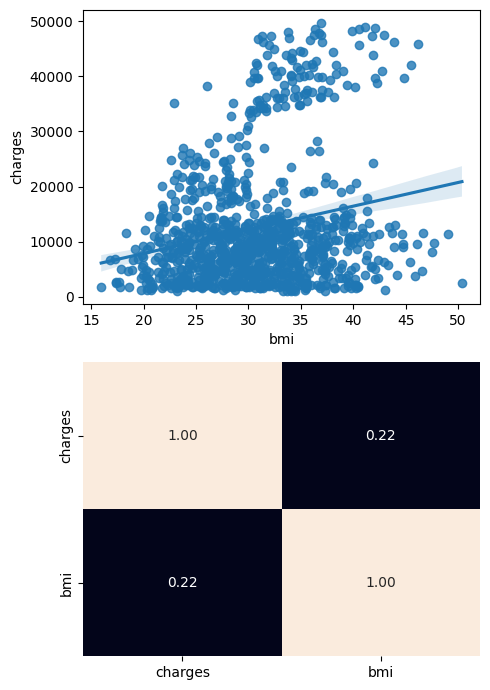

In [40]:
# Probaremos el modelo con la variable bmi (índice de masa corporal)

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = train_data, x = "bmi", y = "charges")
sns.heatmap(train_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

## **Observaciones**
No existe una correlación fuerte entre el índice de masa corporal y las primas de las pólizas, hacer un modelo de regresión en este caso no nos sería de utilidad. 

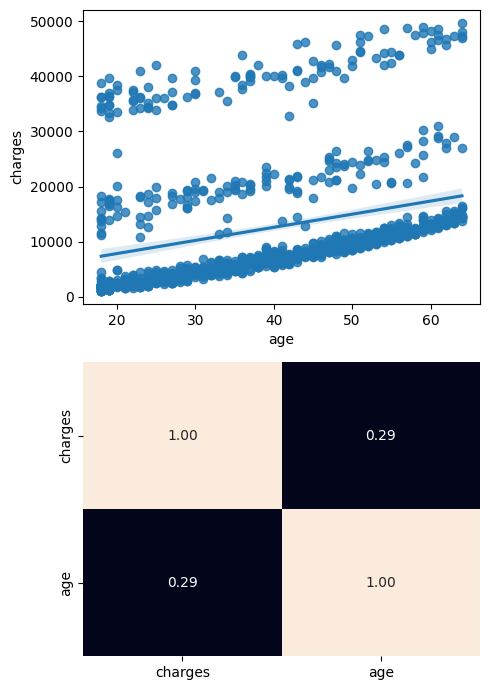

In [41]:
# Probaremos el modelo con la variable edad:

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = train_data, x = "age", y = "charges")
sns.heatmap(train_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

In [42]:
# Resultados de la Regresión Lineal (edad vs póliza):
x1 = train_data['age']
y1 = train_data['charges']

# Crear el modelo de regresión lineal
X1 = sm.add_constant(x1)
model = sm.OLS(y1, X1)

# Ajustar el modelo a los datos
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     94.59
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.99e-21
Time:                        19:02:42   Log-Likelihood:                -10792.
No. Observations:                1007   AIC:                         2.159e+04
Df Residuals:                    1005   BIC:                         2.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3085.7038   1023.144      3.016      0.0

## **Interpretación**

El R2 nos indica que casi el 8% de la variabilidad de las pólizas están explicadas por la edad, con una probabilidad casi 0 (F-statistic). El modelo es significativo. En este caso la edad si tiene una importancia significativa sobre la póliza (pudiendo ser un predictor sobre la misma). 

Cuando la edad es 'cero' (minima edad posible), el mínimo valor promedio esperado de la póliza es de 3085€ (prima promedio). Por otra parte, el incremento promedio para cada unidad en edad es de 238€ (quiere decir que cuanto mayor eres, la póliza incrementa casi 238€ por unidad de edad en promedio).

Por otra parte los intervalos de confianza del 2.5% y 97,5%, sugieren que en el 95% de los casos de las muestras tomadas para el estudio, el aumento de la edad hará incrementar en promedio la póliza entre 189€ y 285€. 

El coeficiente de Durbin-Watson ~ 1,939 (cercano a 2), podría sugerir que no hay una autocorrelación significativa en los residuos (señal de independencia de errores).

Los coeficientes de Omnibus y Jarque-Bera tienen p-valores bajos asociados, rechazando la hipótesis nula (distribución normal de los errores). Esto puede sugerir la aplicabilidad de un modelo no paramétrico.

## Modelo de Regresión Lineal Múltiple

In [52]:
X3 = train_data[['smoker_encoded', 'bmi', 'age']]  # reemplaza con tus variables
y3 = train_data['charges']

# Agregar constante para el intercepto
X_mult = sm.add_constant(X3)

# Ajustar el modelo
modelo = sm.OLS(y3, X_mult).fit()

# Resumen completo del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1717.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:19:34   Log-Likelihood:                -9924.1
No. Observations:                1007   AIC:                         1.986e+04
Df Residuals:                    1003   BIC:                         1.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.214e+04    835.471    -14.

## **Interpretación**

El R2 nos indica que casi el 84% de la variabilidad de las pólizas están explicadas por estas características (condición fumadora, edad y bmi), con una probabilidad casi 0 (F-statistic) el modelo es significativo. Todas ellas generan un efecto estadísticamente significativo sobre el precio de la póliza. 

Cuando las variables predictivas toman un valor cero, el valor de la póliza 'constante' es de -12100€ (aprox), es evidente que la edad y el bmi nunca podrán ser cero, pero podría decirse que el valor de la prima sería cero para estos datos inexistentes. Por otra parte, el incremento promedio para cada unidad en condición de fumador, es lo que incrementa importantemente el valor de la prima, casi por 24000€ en caso de ser positivo. A diferencia de la edad y el bmi que tiene en escala, un incremento por 3 cifras, estaríamos hablando de cientos de €, específicamente 257€ y 314€ por unidad de aumento de cada una. 

El coeficiente de Durbin-Watson ~ 2,082 (cercano a 2), podría sugerir que no hay una autocorrelación significativa en los residuos (señal de independencia de errores).

Los coeficientes de Omnibus y Jarque-Bera tienen p-valores bajos asociados, rechazando la hipótesis nula (distribución normal de los errores). Esto puede sugerir la aplicabilidad de un modelo no paramétrico.